# **Partnership Prediction of Players**
---

## **Importing libraries and setting up the data repository :**

In [129]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
df_deliveries = pd.read_csv('../csv_files/deliveries.csv')
pd.options.display.max_columns = None

The 'deliveries.csv' file has been included in the repository.

## **Exploratory Data Analysis (EDA)**

In [131]:
df_deliveries.shape

(17380, 22)

In [132]:
df_deliveries.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,TA Boult,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
df_deliveries.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [134]:
df_deliveries.dtypes

match_id                    int64
season                     object
start_date                 object
venue                      object
innings                     int64
ball                      float64
batting_team               object
bowling_team               object
striker                    object
non_striker                object
bowler                     object
runs_off_bat                int64
extras                      int64
wides                     float64
noballs                   float64
byes                      float64
legbyes                   float64
penalty                   float64
wicket_type                object
player_dismissed           object
other_wicket_type         float64
other_player_dismissed    float64
dtype: object

In the dataset, the columns 'season', 'start_date', 'venue', 'batting_team', 'bowling_team', 'striker', 'non-striker', 'bowler', 'wicket_type' and 'player_dismissed' are categorical, meaning they represent different categories or labels. On the other hand, 'match_id', 'innings', 'ball', 'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes', 'penalty', 'other_wicket_type' and 'other_player_dismissed' are numerical columns, containing quantitative information.

In [135]:
df_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17380 entries, 0 to 17379
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                17380 non-null  int64  
 1   season                  17380 non-null  object 
 2   start_date              17380 non-null  object 
 3   venue                   17380 non-null  object 
 4   innings                 17380 non-null  int64  
 5   ball                    17380 non-null  float64
 6   batting_team            17380 non-null  object 
 7   bowling_team            17380 non-null  object 
 8   striker                 17380 non-null  object 
 9   non_striker             17380 non-null  object 
 10  bowler                  17380 non-null  object 
 11  runs_off_bat            17380 non-null  int64  
 12  extras                  17380 non-null  int64  
 13  wides                   431 non-null    float64
 14  noballs                 42 non-null   

In [136]:
df_deliveries.describe()

,match_id,innings,ball,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,other_wicket_type,other_player_dismissed
count,17380.000000,17380.000000,17380.000000,17380.000000,17380.000000,431.000000,42.0,26.000000,117.000000,1.0,0.0,0.0
mean,16.418815,1.453797,22.544108,0.895224,0.044649,1.225058,1.0,2.153846,1.239316,5.0,NaN,NaN
std,9.196759,0.497875,13.638454,1.392734,0.285378,0.864237,0.0,1.433661,0.738703,NaN,NaN,NaN
min,1.000000,1.000000,0.100000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,5.0,NaN,NaN
25%,8.000000,1.000000,10.600000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,5.0,NaN,NaN
50%,17.000000,1.000000,22.100000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,5.0,NaN,NaN
75%,24.000000,2.000000,33.500000,1.000000,0.000000,1.000000,1.0,4.000000,1.000000,5.0,NaN,NaN
max,32.000000,2.000000,49.700000,6.000000,5.000000,5.000000,1.0,4.000000,4.000000,5.0,NaN,NaN


In [137]:
def print_unique_values(df_deliveries, categorical_columns):
  for col in categorical_columns:
      print(f'{col}: {df_deliveries[col].unique()}')

In [138]:
categorical_columns = [col for col in df_deliveries if df_deliveries[col].dtype == 'object']
print_unique_values(df_deliveries,categorical_columns)

season: ['2023/24']
start_date: ['2023-10-05' '2023-10-06' '2023-10-07' '2023-10-08' '2023-10-09'
 '2023-10-10' '2023-10-11' '2023-10-13' '2023-10-14' '2023-10-15'
 '2023-10-16' '2023-10-17' '2023-10-18' '2023-10-19' '2023-10-20'
 '2023-10-21' '2023-10-22' '2023-10-23' '2023-10-12' '2023-10-24'
 '2023-10-25' '2023-10-26' '2023-10-27' '2023-10-28' '2023-10-29'
 '2023-10-30' '2023-10-31' '2023-11-01']
venue: ['Narendra Modi Stadium, Ahmedabad'
 'Rajiv Gandhi International Stadium, Uppal, Hyderabad'
 'Himachal Pradesh Cricket Association Stadium, Dharamsala'
 'Arun Jaitley Stadium, Delhi' 'MA Chidambaram Stadium, Chepauk, Chennai'
 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow'
 'Maharashtra Cricket Association Stadium, Pune'
 'M Chinnaswamy Stadium, Bengaluru' 'Wankhede Stadium, Mumbai'
 'Eden Gardens, Kolkata']
batting_team: ['England' 'New Zealand' 'Pakistan' 'Netherlands' 'Afghanistan'
 'Bangladesh' 'South Africa' 'Sri Lanka' 'Australia' 'India']
bowling_team:

Batting_team and bowling_team are permutations of teams participating in Worldcup 2023. 

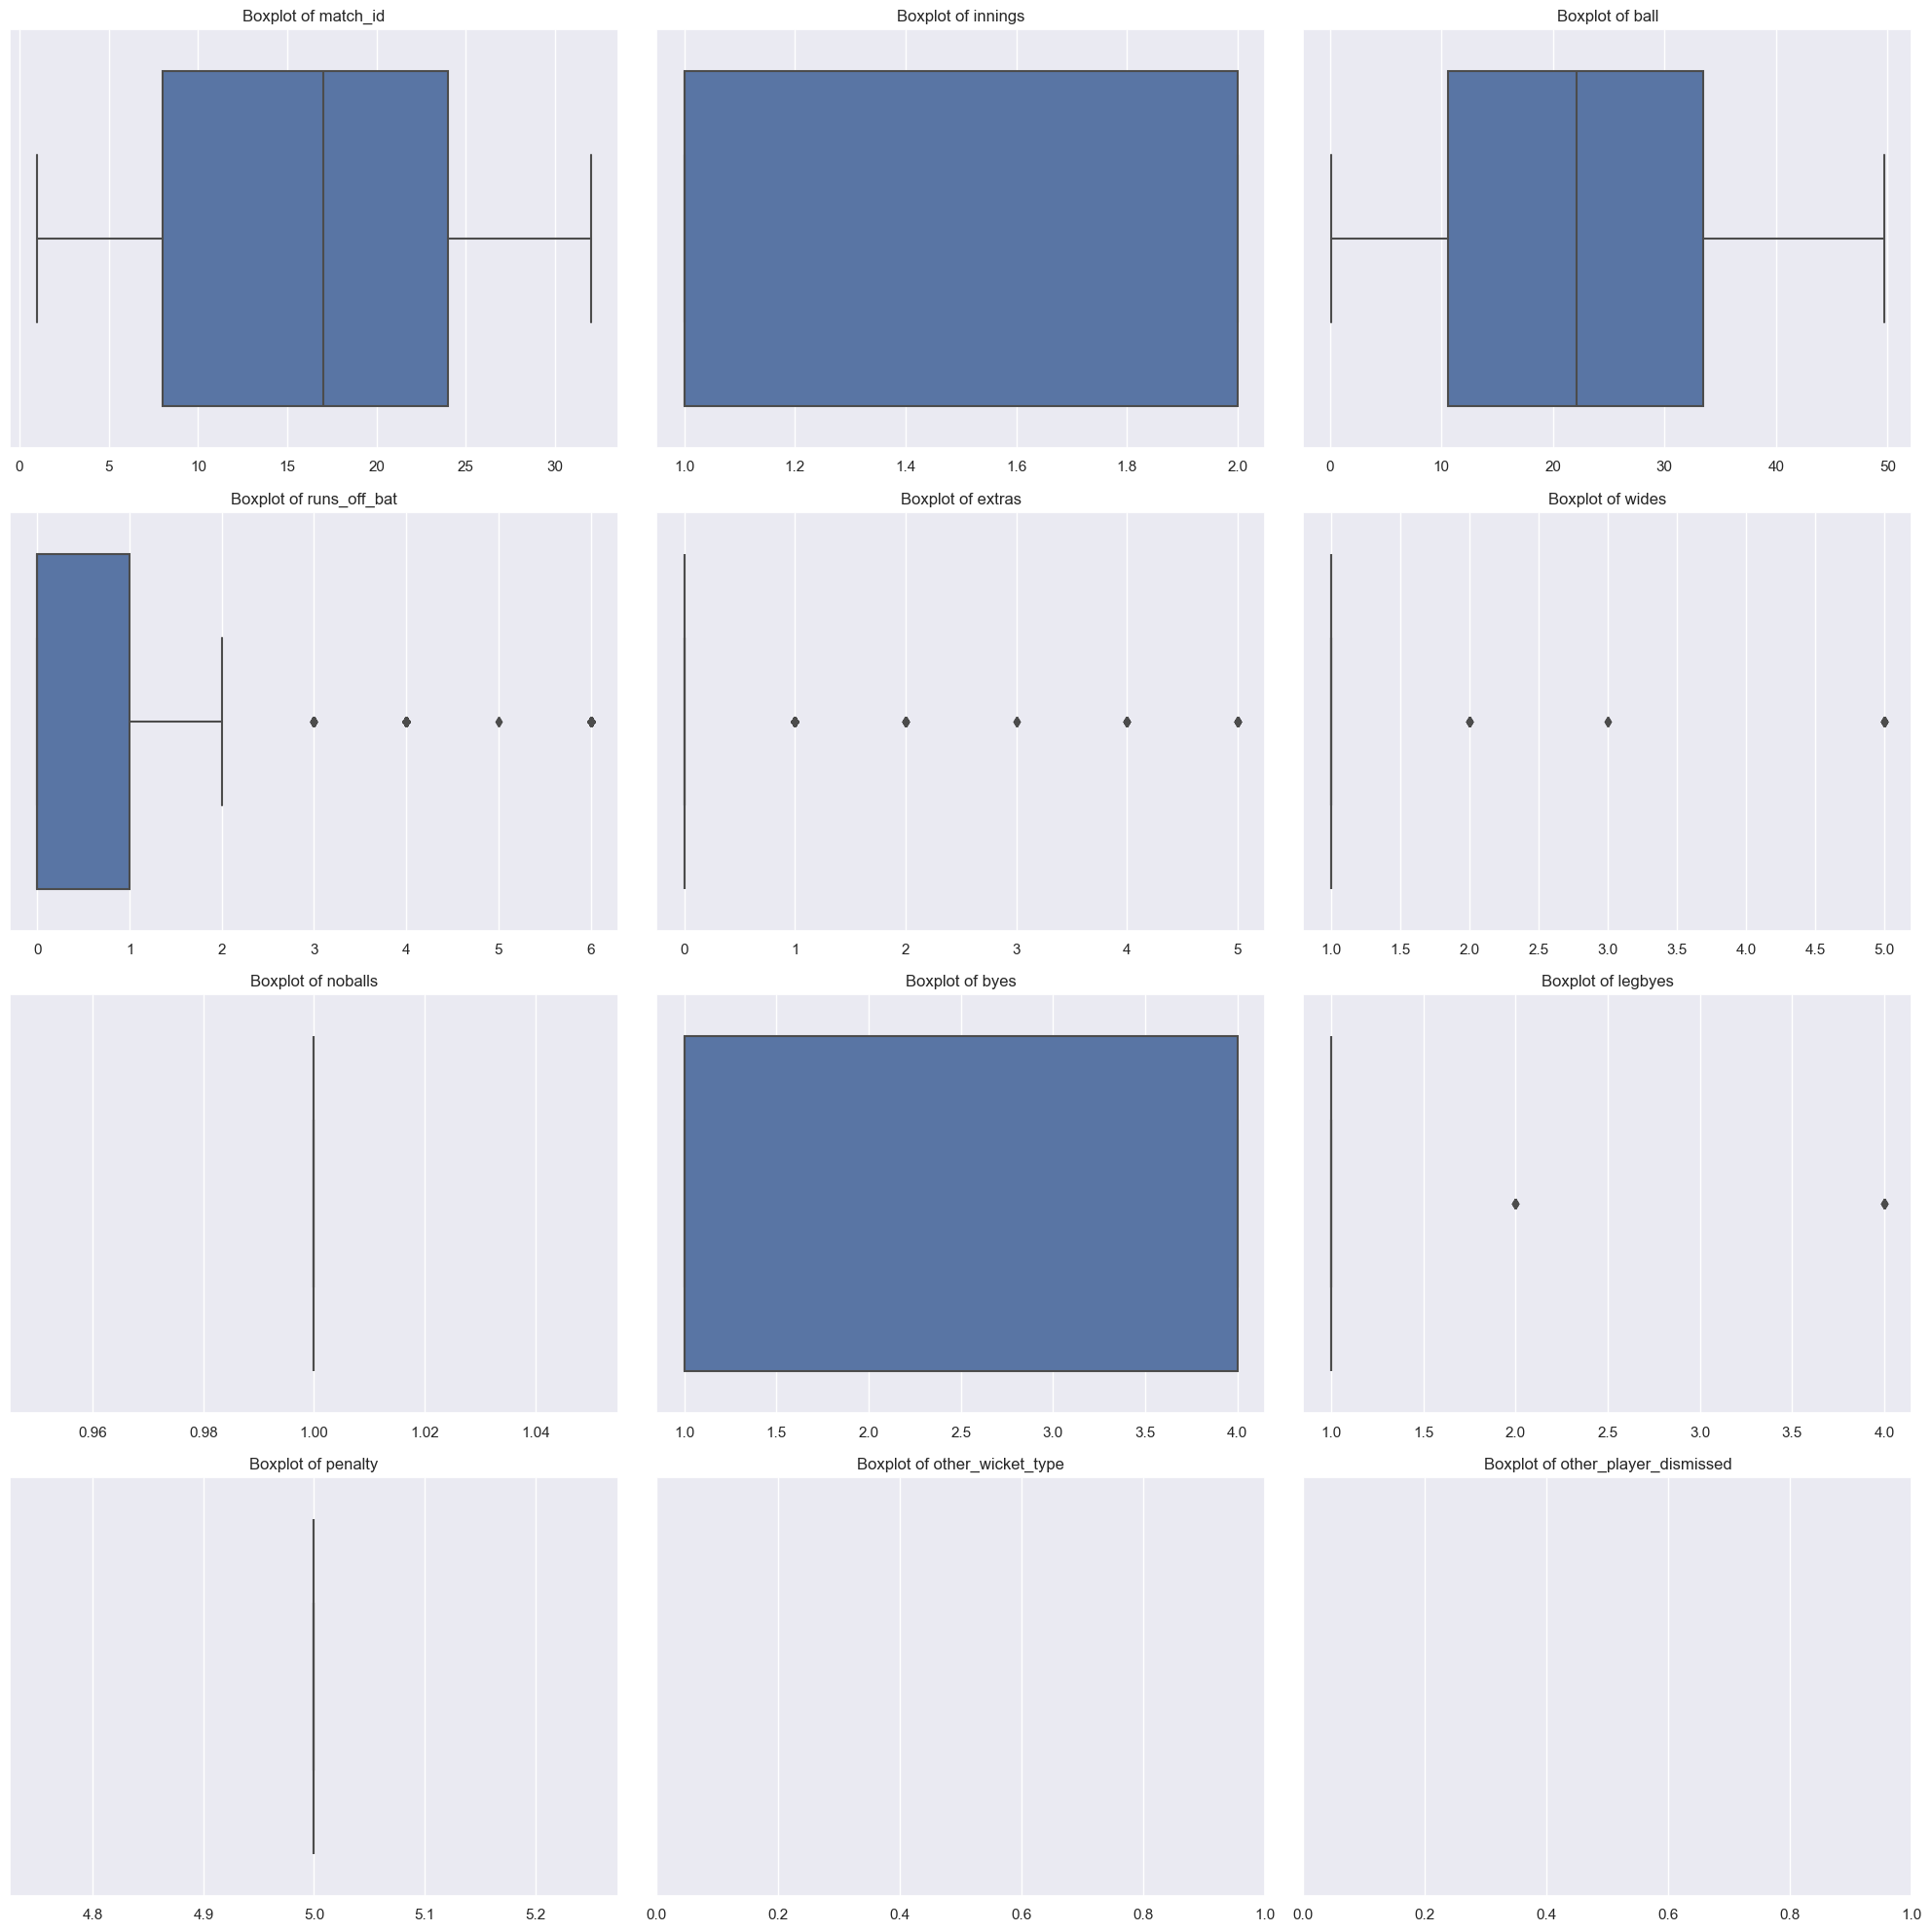

In [139]:
sns.set_theme(style="darkgrid")

fig, axes = plt.subplots(4, 3, figsize=(20, 20))

axes = axes.flatten()

numeric_columns = [col for col in df_deliveries if df_deliveries[col].dtype != 'object']

for ax, col in zip(axes, numeric_columns):
    sns.boxplot(x=df_deliveries[col], ax=ax)
    ax.set_title(f'Boxplot of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('')

for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [140]:
print('Outlier in percentage')

for col in numeric_columns:
    q1=df_deliveries[col].quantile(0.25)
    q3=df_deliveries[col].quantile(0.75)
    iqr=q3-q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    count=0
    for val in df_deliveries[col]:
        if val>upper or val<lower:
            count=count+1

    print(col +' : '+str(count/len(df_deliveries[col])*100)+' %')

Outlier in percentage
match_id : 0.0 %
innings : 0.0 %
ball : 0.0 %
runs_off_bat : 11.208285385500576 %
extras : 3.5500575373993093 %
wides : 0.1956271576524741 %
noballs : 0.0 %
byes : 0.0 %
legbyes : 0.0805523590333717 %
penalty : 0.0 %
other_wicket_type : 0.0 %
other_player_dismissed : 0.0 %


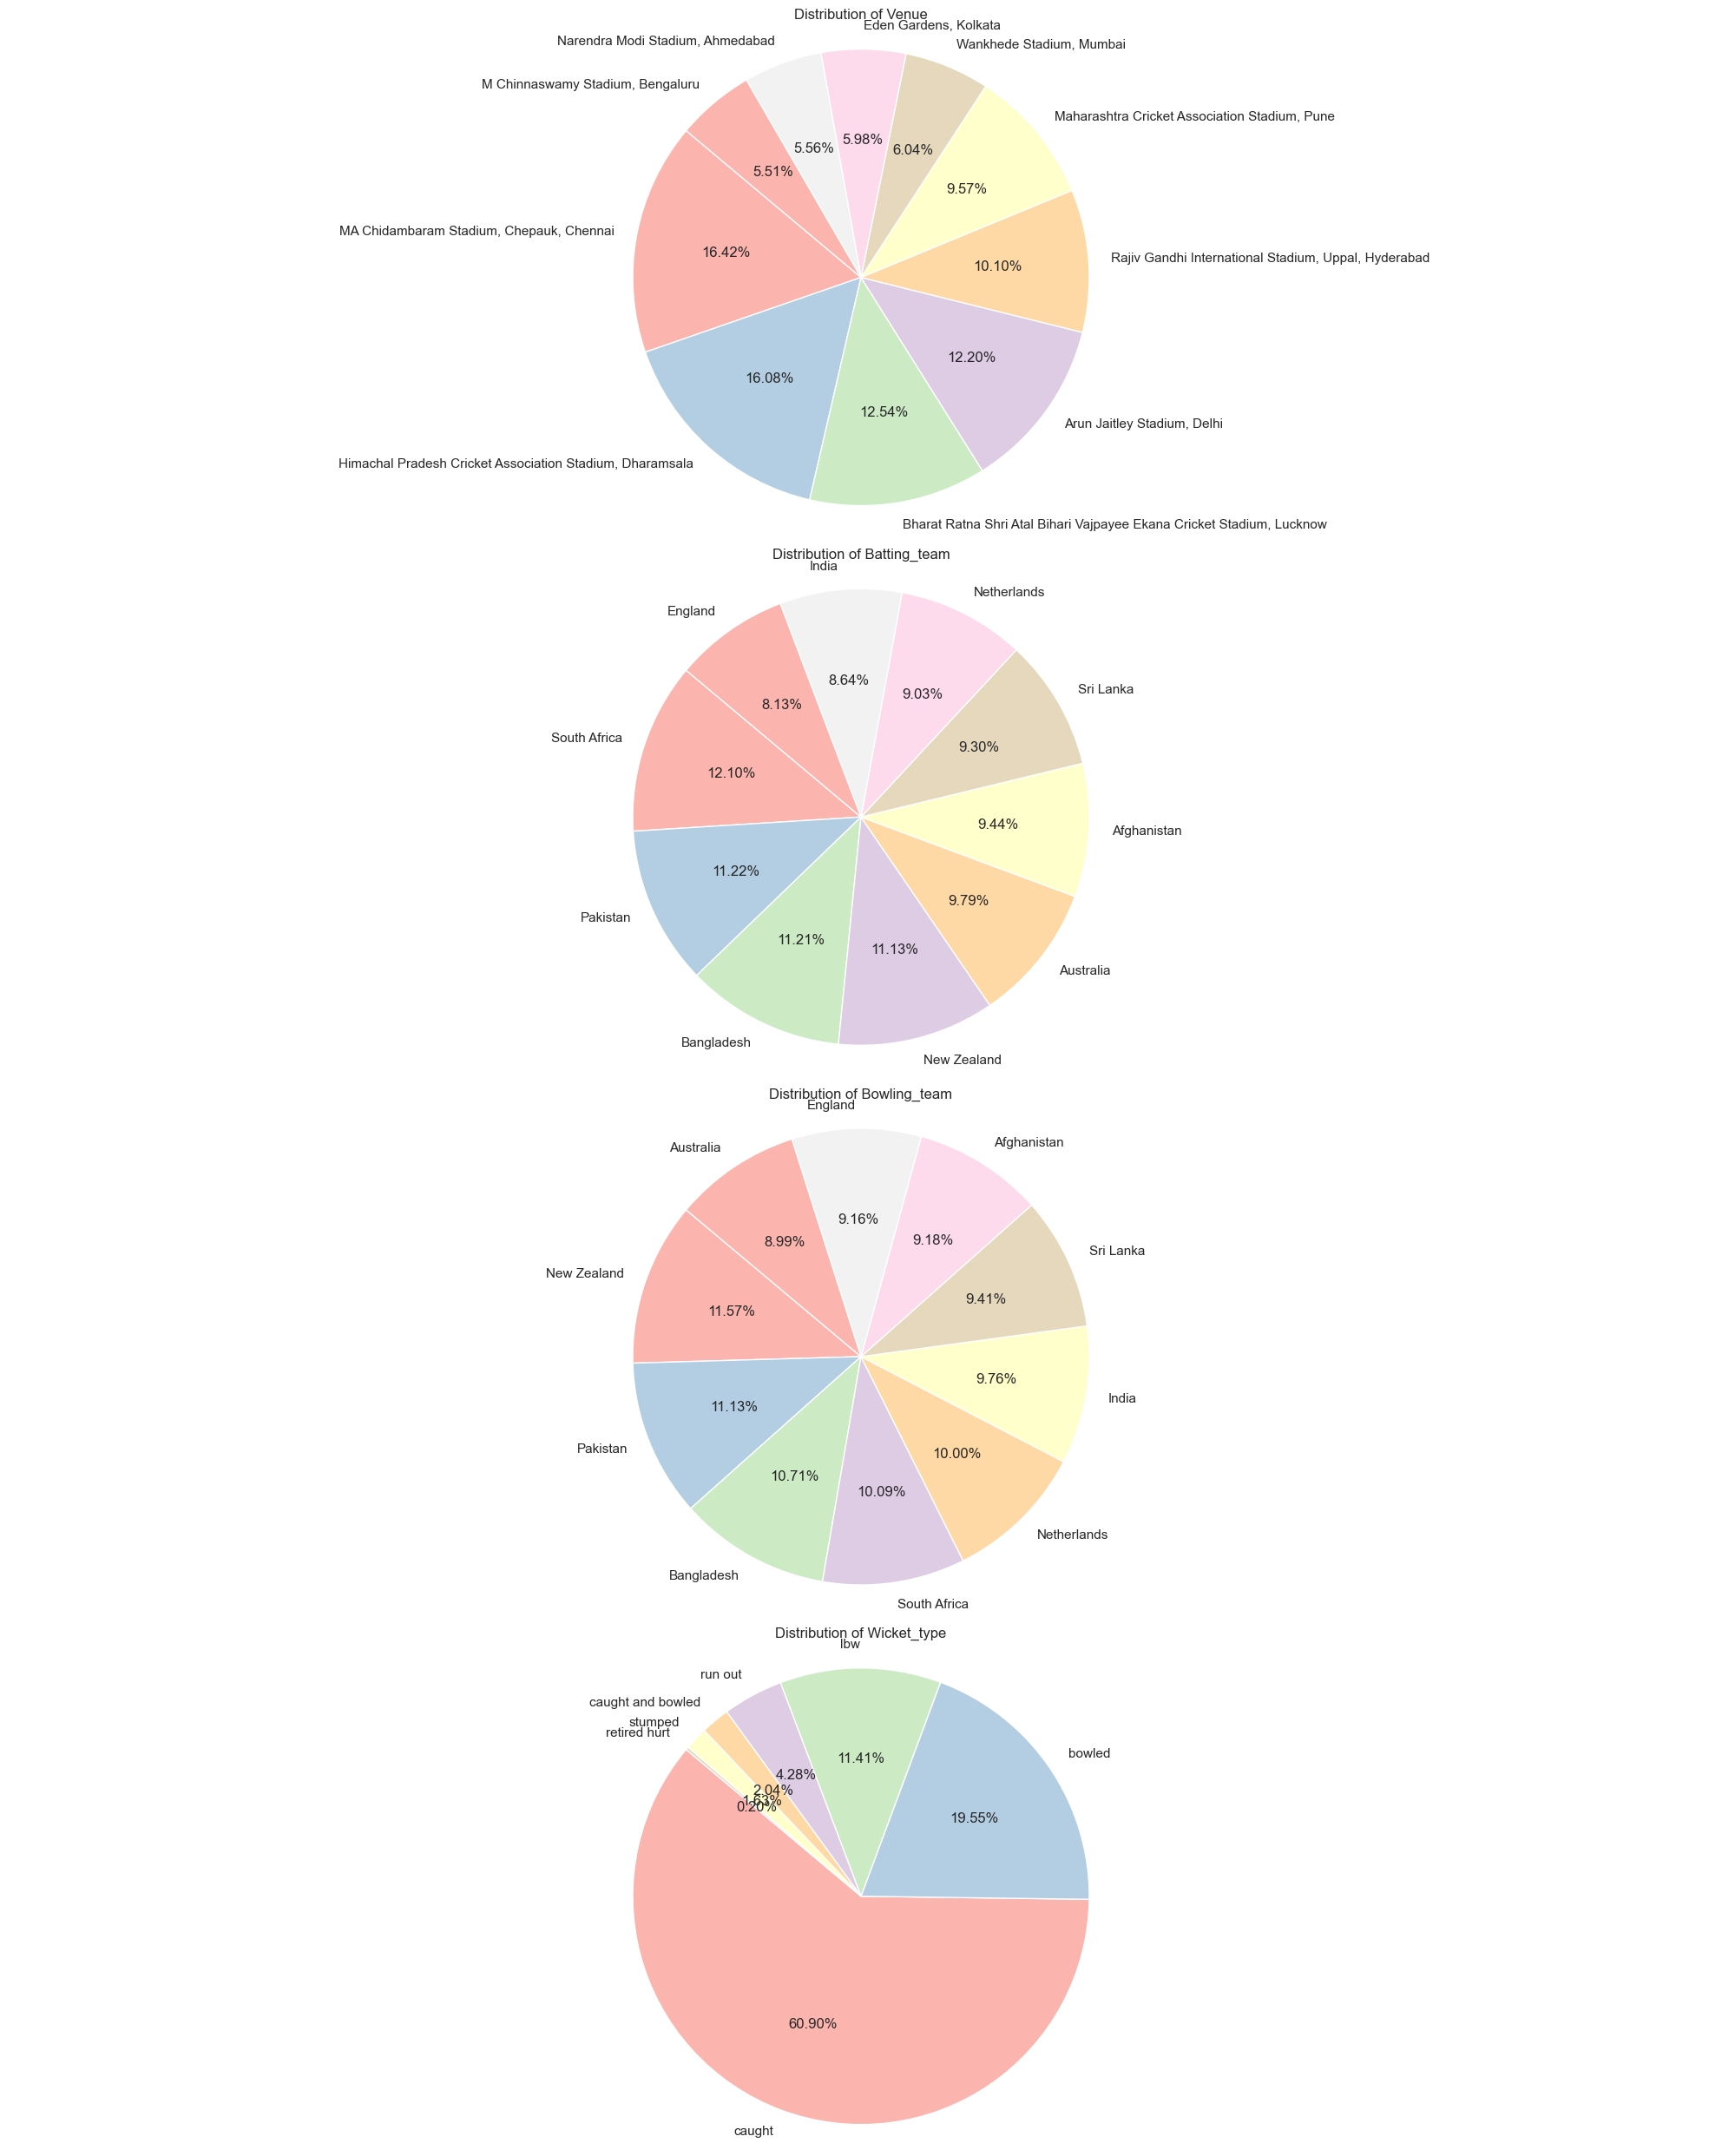

In [141]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(4, 1, figsize=(20, 25))

color_palette = sns.color_palette('Pastel1')

axes = axes.flatten()
categorical_columns = ['venue','batting_team','bowling_team','wicket_type']

for idx, feature in enumerate(categorical_columns):
    feature_counts = df_deliveries[feature].value_counts()
    labels = feature_counts.index
    sizes = feature_counts.values
    colors = color_palette[:len(labels)]

    ax = axes[idx]

    ax.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)
    ax.set_title(f'Distribution of {feature.capitalize()}')
    ax.axis('equal')

for i in range(len(categorical_columns), 2):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

The pie chart shows that some stadiums have hosted more matches, while others have had fewer matches, and most of the players got out because of getting caught.

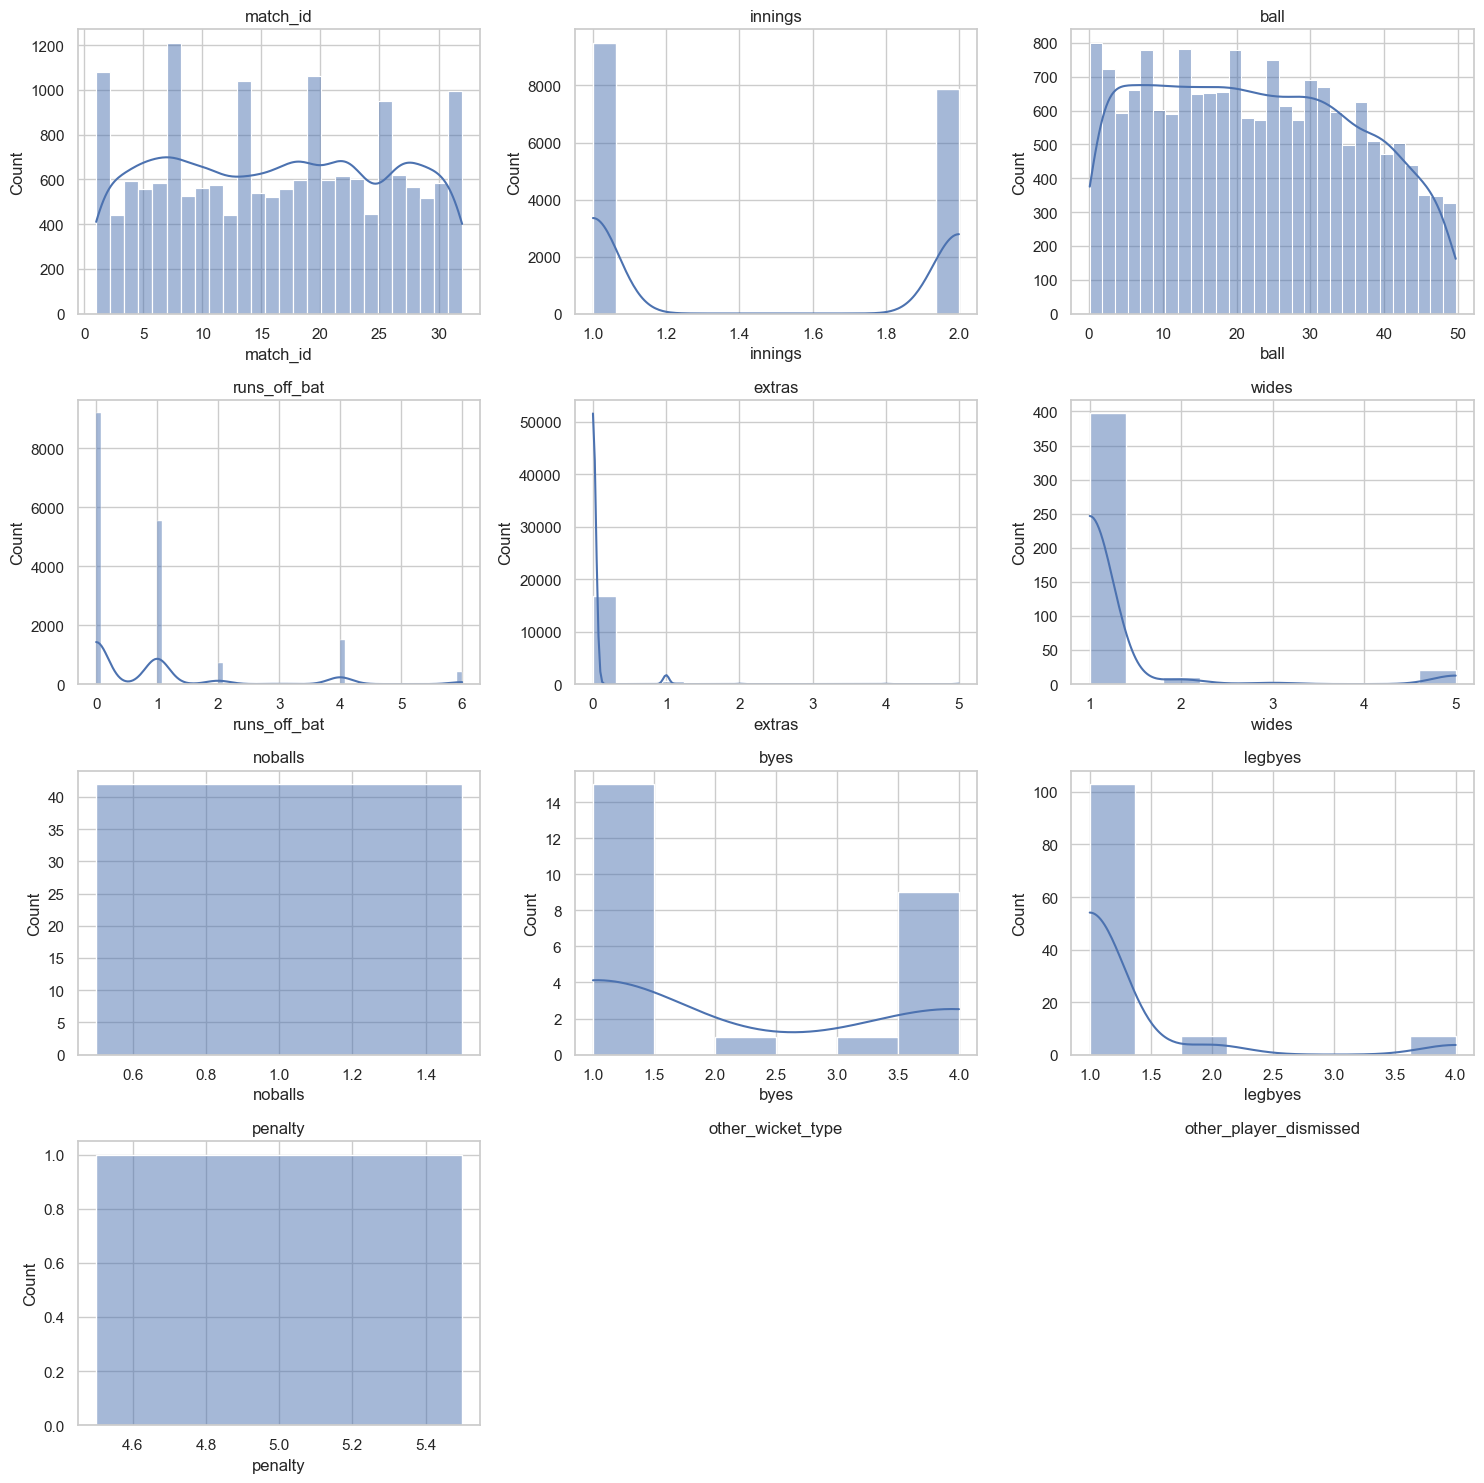

In [142]:
fig, ax = plt.subplots(4, 3, figsize=(15, 15))
ax=ax.ravel()

for axid, col in enumerate(numeric_columns):
    sns.histplot(df_deliveries[col], ax=ax[axid],kde=True)
    ax[axid].set_title(col)


for axid in range(10, 12):
    ax[axid].axis('off')

plt.tight_layout()
plt.show()

This distribution shows the density of several numerical columns. It shows that most of them are skewed.

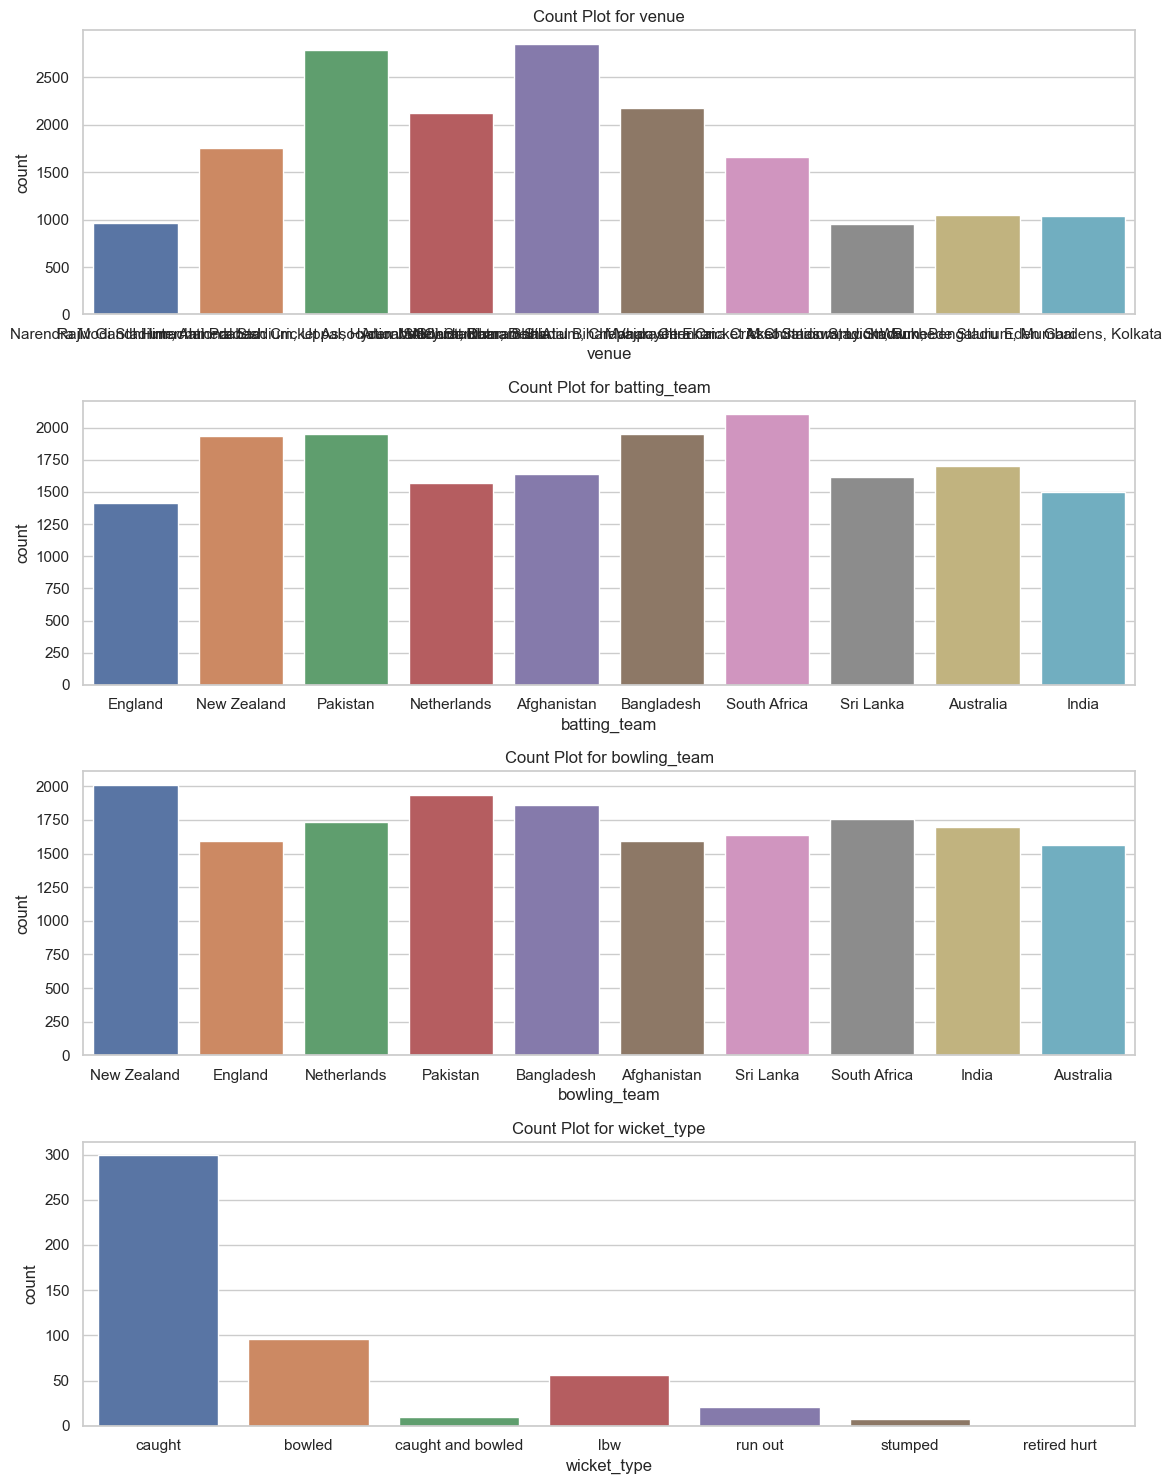

In [143]:
columns_to_plot = categorical_columns

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 15))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    sns.countplot(data=df_deliveries, x=column, ax=axes[i])
    axes[i].set_title(f'Count Plot for {column}')

plt.tight_layout()
plt.show()

The plot illustrates that the highest number of matches were held at Himachal Pradesh Cricket Association Stadium, Dharamshala, and MA Chidambaram Stadium, Chennai. Also, we can see that most of the players got out during the match due to getting catch out.

<Axes: xlabel='batting_team', ylabel='count'>

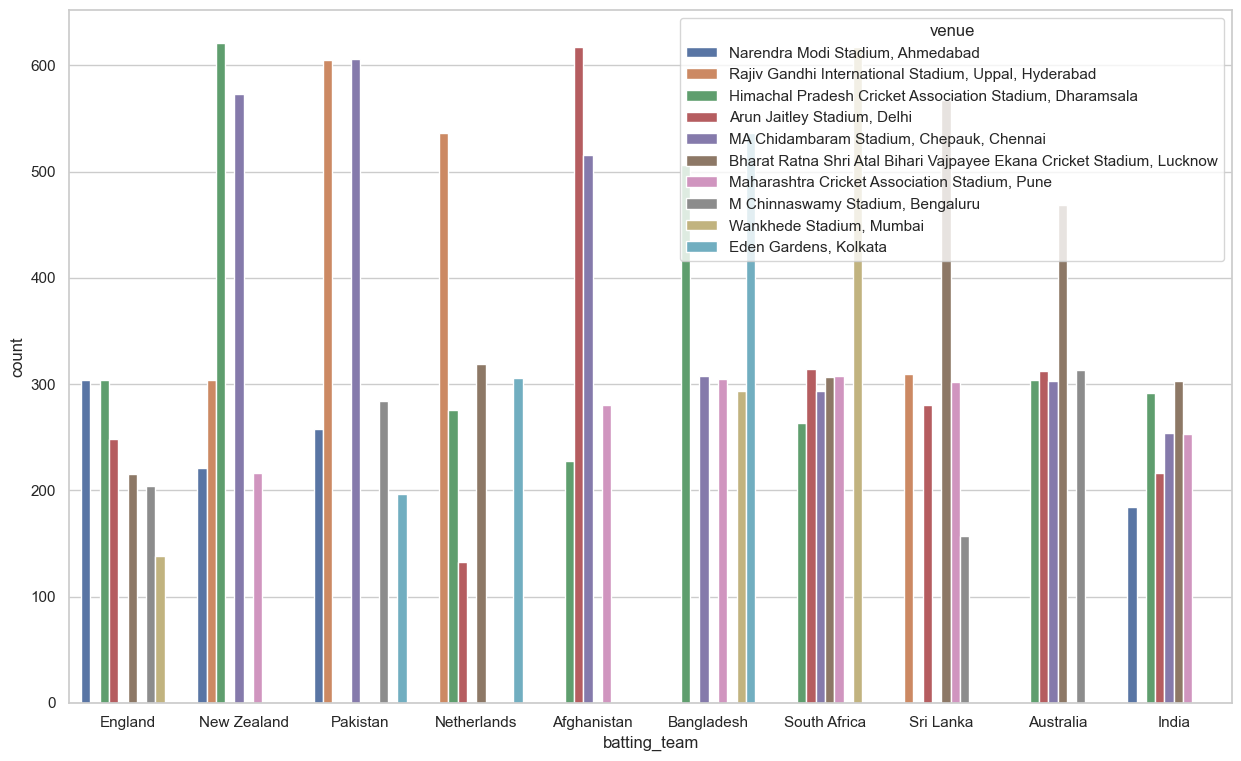

In [144]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 9))
sns.countplot(data=df_deliveries, x="batting_team", hue="venue")

The resulting plot displays a visual representation of how many matches each batting team has played in different venues. Each bar corresponds to a batting team, and the height of the bar represents the count of matches played by that team. The bars are further divided into segments based on the venues to see the distribution of matches played by each team across various venues.

<Axes: xlabel='wicket_type', ylabel='count'>

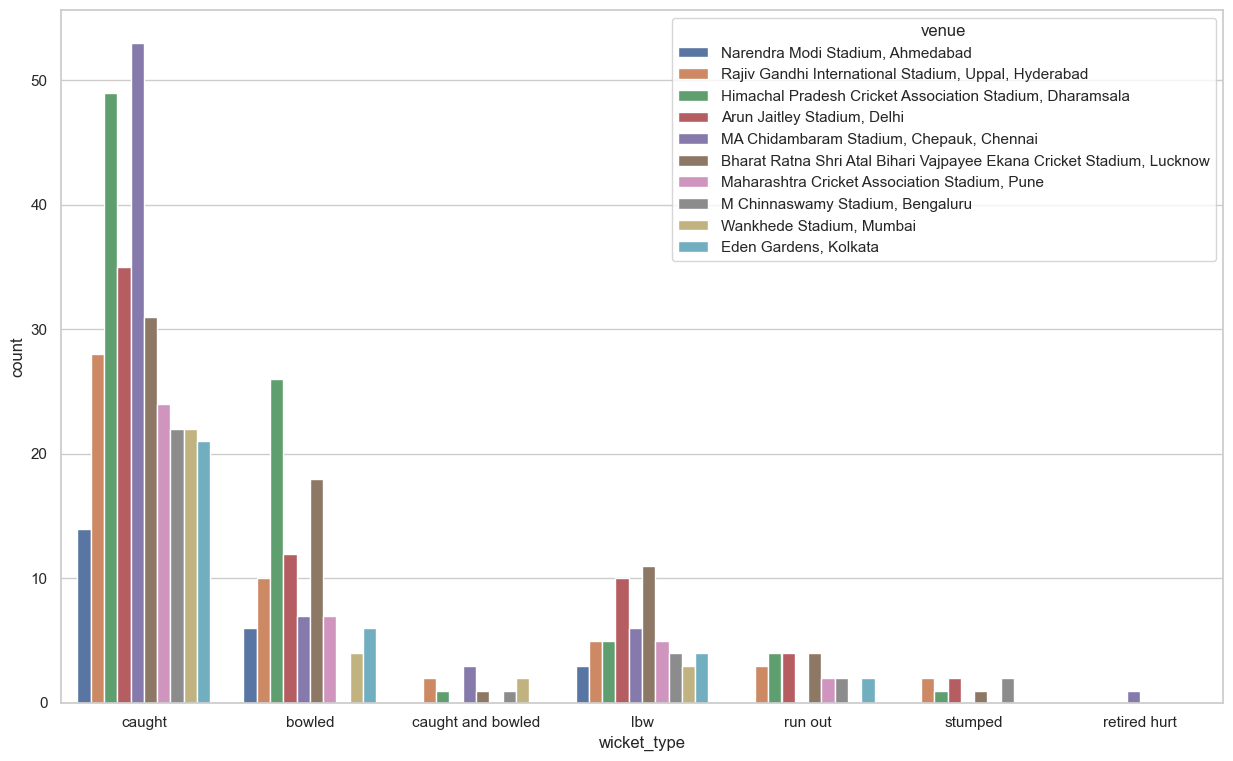

In [145]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 9))
sns.countplot(data=df_deliveries, x="wicket_type", hue="venue")

The resulting plot displays a visual representation of how many wickets of each type (like caught, bowled, lbw, etc.) have occurred in different venues. Each bar corresponds to a wicket type, and the height of the bar represents the count of wickets of that type. The bars are further divided into segments based on the venues, allowing you to see the distribution of each wicket type across various venues.

<Axes: xlabel='batting_team', ylabel='count'>

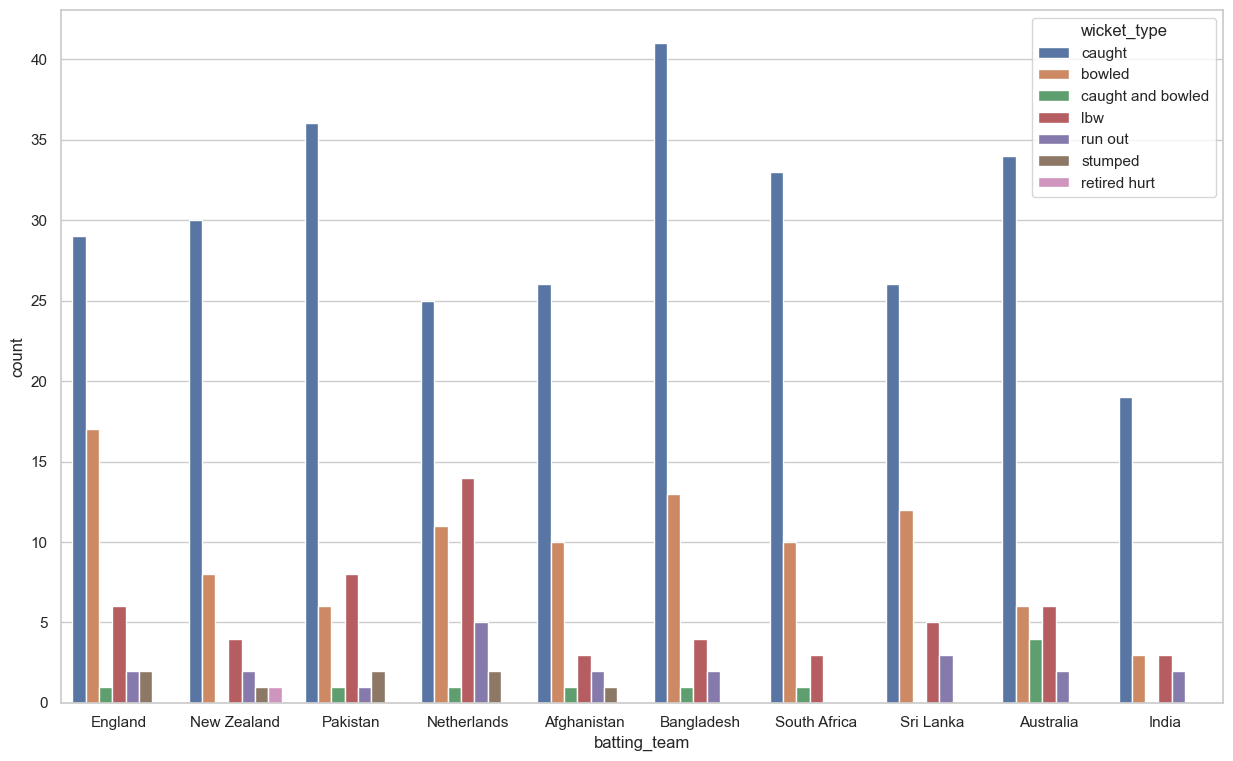

In [146]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 9))
sns.countplot(data=df_deliveries, x="batting_team", hue="wicket_type")

The resulting plot displays a visual representation of how many wickets of each type (like caught, bowled, lbw, etc.) have occurred for each batting team. Each bar corresponds to a batting team, and the height of the bar represents the count of wickets of that type. The bars are further differentiated by color, representing the distribution of each wicket type for each batting team.

## **Data Pre-Processing**

In [147]:
df_deliveries[['wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type','other_player_dismissed']] = df_deliveries[['wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type','other_player_dismissed']].fillna(0)

We have filled all the nulls or the blank values with 0.

In [148]:
df_deliveries.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
1,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,6,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
2,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,1,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
3,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,TA Boult,1,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
4,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,4,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0


In [149]:
df_deliveries.isna().sum()

match_id                  0
season                    0
start_date                0
venue                     0
innings                   0
ball                      0
batting_team              0
bowling_team              0
striker                   0
non_striker               0
bowler                    0
runs_off_bat              0
extras                    0
wides                     0
noballs                   0
byes                      0
legbyes                   0
penalty                   0
wicket_type               0
player_dismissed          0
other_wicket_type         0
other_player_dismissed    0
dtype: int64

In [150]:
partnership_runs = 0
current_innings = None

def is_wicket(row):
    return row['wicket_type'] != 0

for index, row in df_deliveries.iterrows():
    # if innings has changed
    if row['innings'] != current_innings:
        current_innings = row['innings']
        partnership_runs = 0
        
    # if wicket has fallen
    if is_wicket(row):  
        df_deliveries.at[index, 'partnership_runs'] = partnership_runs
        partnership_runs = 0
        continue
    else:
        partnership_runs += row['runs_off_bat']
        
    df_deliveries.at[index, 'partnership_runs'] = partnership_runs


Here, we calculate the partnership runs for each delivery in a cricket match. The 'partnership_runs' represent the cumulative runs scored by the batting pair until a wicket falls or the innings change, at which point the count is reset.

In [151]:
df_deliveries.head(100)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,partnership_runs
0,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0
1,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,6,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,6.0
2,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,1,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,7.0
3,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,TA Boult,1,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,8.0
4,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,4,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,15.4,England,New Zealand,JE Root,HC Brook,JDS Neesham,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,14.0
96,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,15.5,England,New Zealand,JE Root,HC Brook,JDS Neesham,1,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,15.0
97,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,15.6,England,New Zealand,HC Brook,JE Root,JDS Neesham,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,15.0
98,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,16.1,England,New Zealand,JE Root,HC Brook,R Ravindra,1,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,16.0


In [152]:
df_deliveries = df_deliveries[df_deliveries['wicket_type'] != 0]

This is done in order to filter the dataset and keep only the rows for finally calculated partnership runs which shows the runs made by a particular partnership of players until one of them gets out or the match ends.

In [153]:
df_deliveries.head(100)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,partnership_runs
47,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,7.4,England,New Zealand,DJ Malan,JM Bairstow,MJ Henry,0,0,0.0,0.0,0.0,0.0,0.0,caught,DJ Malan,0.0,0.0,38.0
78,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,12.5,England,New Zealand,JM Bairstow,JE Root,MJ Santner,0,0,0.0,0.0,0.0,0.0,0.0,caught,JM Bairstow,0.0,0.0,24.0
103,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,16.6,England,New Zealand,HC Brook,JE Root,R Ravindra,0,0,0.0,0.0,0.0,0.0,0.0,caught,HC Brook,0.0,0.0,30.0
130,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,21.2,England,New Zealand,MM Ali,JE Root,GD Phillips,0,0,0.0,0.0,0.0,0.0,0.0,bowled,MM Ali,0.0,0.0,23.0
202,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,33.2,England,New Zealand,JC Buttler,JE Root,MJ Henry,0,0,0.0,0.0,0.0,0.0,0.0,caught,JC Buttler,0.0,0.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3529,7,2023/24,2023-10-10,"Himachal Pradesh Cricket Association Stadium, ...",1,44.3,England,Bangladesh,HC Brook,SM Curran,Mahedi Hasan,0,0,0.0,0.0,0.0,0.0,0.0,caught,HC Brook,0.0,0.0,20.0
3542,7,2023/24,2023-10-10,"Himachal Pradesh Cricket Association Stadium, ...",1,46.4,England,Bangladesh,SM Curran,CR Woakes,Mahedi Hasan,0,0,0.0,0.0,0.0,0.0,0.0,caught,SM Curran,0.0,0.0,7.0
3553,7,2023/24,2023-10-10,"Himachal Pradesh Cricket Association Stadium, ...",1,48.3,England,Bangladesh,AU Rashid,CR Woakes,Mahedi Hasan,0,0,0.0,0.0,0.0,0.0,0.0,caught,AU Rashid,0.0,0.0,18.0
3558,7,2023/24,2023-10-10,"Himachal Pradesh Cricket Association Stadium, ...",1,49.2,England,Bangladesh,CR Woakes,MA Wood,Taskin Ahmed,0,0,0.0,0.0,0.0,0.0,0.0,caught,CR Woakes,0.0,0.0,10.0


Therefore, here we get the dataframe which consists of the runs made during the partnership.

In [154]:
df_deliveries = df_deliveries.drop(['innings','season','start_date','batting_team', 'bowling_team', 'ball','runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty','other_wicket_type','other_player_dismissed','player_dismissed','match_id'],axis='columns')

In [155]:
df_deliveries.columns

Index(['venue', 'striker', 'non_striker', 'bowler', 'wicket_type',
       'partnership_runs'],
      dtype='object')

In [156]:
cat = [col for col in df_deliveries if df_deliveries[col].dtype == 'object']
cat

['venue', 'striker', 'non_striker', 'bowler', 'wicket_type']

## **Data Transformations**

In [157]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

Now, we will encode the categorical columns with numerical values using Label Encoder.

In [158]:
mapping = {}

for column in cat:
    df_deliveries[column] = le.fit_transform(df_deliveries[column])
    mapping[column] = dict(zip(le.classes_, le.transform(le.classes_)))

In [159]:
for column_name in cat:
    print(f'Mapping for column "{column_name}":')
    for key, value in mapping[column_name].items():
        print(f'{key}: {value}')
    print()


Mapping for column "venue":
Arun Jaitley Stadium, Delhi: 0
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow: 1
Eden Gardens, Kolkata: 2
Himachal Pradesh Cricket Association Stadium, Dharamsala: 3
M Chinnaswamy Stadium, Bengaluru: 4
MA Chidambaram Stadium, Chepauk, Chennai: 5
Maharashtra Cricket Association Stadium, Pune: 6
Narendra Modi Stadium, Ahmedabad: 7
Rajiv Gandhi International Stadium, Uppal, Hyderabad: 8
Wankhede Stadium, Mumbai: 9

Mapping for column "striker":
A Dutt: 0
A Zampa: 1
AAP Atkinson: 2
AD Mathews: 3
AK Markram: 4
AT Carey: 5
AT Nidamanuru: 6
AU Rashid: 7
Abdullah Shafique: 8
Azmatullah Omarzai: 9
BA Stokes: 10
BFW de Leede: 11
BKG Mendis: 12
Babar Azam: 13
C Green: 14
C Karunaratne: 15
CAK Rajitha: 16
CBRLS Kumara: 17
CN Ackermann: 18
CR Woakes: 19
D Madushanka: 20
DA Miller: 21
DA Warner: 22
DJ Malan: 23
DJ Mitchell: 24
DJ Willey: 25
DM de Silva: 26
DN Wellalage: 27
DP Conway: 28
FDM Karunaratne: 29
Fakhar Zaman: 30
Fazalhaq Farooqi: 31
G Coe

## **Model Training and Testing**

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Models-------------------------
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb


In [18]:
X = df_deliveries[['venue', 'striker',
       'non_striker', 'bowler', 'wicket_type']]
y = df_deliveries['partnership_runs']

In [19]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, shuffle=True)

In [20]:
# size_scaler = preprocessing.StandardScaler().fit(X_train)
# X_train_scaled = size_scaler.transform(X_train)
# X_test_scaled = size_scaler.transform(X_test)
# X_train_scaled.shape, X_test_scaled.shape

In [22]:
model_dict = {
    'LinearRegression': {"model": LinearRegression(), "params": {}},
    'RandomForestRegressor': {"model": RandomForestRegressor(),
                     "params": {'n_estimators': list(range(5, 100, 5)), 'max_depth': list(range(1, 40, 2))}},
    'XGBRegressor': {"model": XGBRegressor(), "params": {'n_estimators': list(range(10, 800, 50)), 'learning_rate': [0.001, 0.01, 0.1]}},
    'PolynomialFeatures': {"model": make_pipeline(PolynomialFeatures(), LinearRegression()),
                      "params": {'polynomialfeatures__degree': [10,2,3,4,5,6,7,8,9]}},
    'CatBoostRegressor': {"model": CatBoostRegressor(iterations=100, learning_rate=0.01), "params": {}},
    'LGBMRegressor': {"model": lgb.LGBMRegressor(learning_rate=0.01), "params": {}}
}


In [23]:
from sklearn.model_selection import cross_val_score

def eval_models_with_cv():
    model_results = pd.DataFrame()
    model_results['Train_RMSE'] = None
    model_results['Test_RMSE'] = None
    model_results['Train_MAE'] = None
    model_results['Test_MAE'] = None
    model_results['best_params'] = None
    best_test_score = math.inf

    for model_name, reg_model in model_dict.items():
        classifier = GridSearchCV(reg_model['model'], reg_model['params'], n_jobs=20, verbose=0)
        classifier.fit(X_train, y_train)
        best_model = classifier.best_estimator_

        y_train_predicted = best_model.predict(X_train)
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_predicted))
        train_mae = mean_absolute_error(y_train, y_train_predicted)

        print(model_name, train_rmse, classifier.best_params_)

        # Cross-validation
        cv_rmse = np.sqrt(-cross_val_score(best_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)).mean()
        cv_mae = -cross_val_score(best_model, X_train, y_train, scoring='neg_mean_absolute_error', cv=5).mean()

        y_predicted = best_model.predict(X_test)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
        test_mae = mean_absolute_error(y_test, y_predicted)

        if test_rmse < best_test_score:
            best_test_score = test_rmse
            best_reg_model_ours = best_model

        model_results.loc[model_name, ['Train_RMSE', 'Test_RMSE', 'Train_MAE', 'Test_MAE', 'best_params']] = [train_rmse, test_rmse, train_mae, test_mae, classifier.best_params_]

        model_results.loc[model_name, 'CV_RMSE'] = cv_rmse
        model_results.loc[model_name, 'CV_MAE'] = cv_mae

    print("Best model: ", best_reg_model_ours)
    y_predicted = best_reg_model_ours.predict(X_test)

    return model_results, best_reg_model_ours


In [24]:
model_results,best_reg_model_ours = eval_models_with_cv()
model_results

LinearRegression 34.65908769120329 {}
RandomForestRegressor 34.588527989791736 {'max_depth': 1, 'n_estimators': 10}
XGBRegressor 34.21890709807862 {'learning_rate': 0.001, 'n_estimators': 60}
PolynomialFeatures 33.75669064632213 {'polynomialfeatures__degree': 2}
0:	learn: 35.0169557	total: 148ms	remaining: 14.6s
1:	learn: 34.9803756	total: 150ms	remaining: 7.35s
2:	learn: 34.9468335	total: 152ms	remaining: 4.91s
3:	learn: 34.9311856	total: 153ms	remaining: 3.67s
4:	learn: 34.8959176	total: 154ms	remaining: 2.93s
5:	learn: 34.8593216	total: 155ms	remaining: 2.44s
6:	learn: 34.8328061	total: 157ms	remaining: 2.08s
7:	learn: 34.7987063	total: 158ms	remaining: 1.81s
8:	learn: 34.7622622	total: 160ms	remaining: 1.61s
9:	learn: 34.7376607	total: 161ms	remaining: 1.45s
10:	learn: 34.6896536	total: 162ms	remaining: 1.31s
11:	learn: 34.6556633	total: 163ms	remaining: 1.2s
12:	learn: 34.6240881	total: 164ms	remaining: 1.1s
13:	learn: 34.5935585	total: 165ms	remaining: 1.01s
14:	learn: 34.5720133

,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,best_params,CV_RMSE,CV_MAE
LinearRegression,34.659088,35.216249,23.936419,25.297031,{},34.890614,24.674784
RandomForestRegressor,34.588528,35.139742,24.083427,25.461369,"{'max_depth': 1, 'n_estimators': 10}",35.002275,25.054476
XGBRegressor,34.218907,34.888726,23.840794,25.408988,"{'learning_rate': 0.001, 'n_estimators': 60}",34.623219,24.668728
PolynomialFeatures,33.756691,35.596403,23.106571,26.249535,{'polynomialfeatures__degree': 2},35.003618,24.533398
CatBoostRegressor,32.577972,34.814018,22.456021,25.214043,{},34.718769,24.460518
LGBMRegressor,31.472982,35.051249,21.339451,25.183157,{},34.910357,24.425512


In [25]:
print(best_reg_model_ours)

In [26]:
y_predicted = best_reg_model_ours.predict(X_test)

In [27]:
classifier=best_reg_model_ours
classifier.fit(X_train,y_train)

0:	learn: 35.0169557	total: 1.07ms	remaining: 106ms
1:	learn: 34.9803756	total: 1.98ms	remaining: 97.1ms
2:	learn: 34.9468335	total: 2.54ms	remaining: 82ms
3:	learn: 34.9311856	total: 3.02ms	remaining: 72.6ms
4:	learn: 34.8959176	total: 3.58ms	remaining: 68ms
5:	learn: 34.8593216	total: 4.12ms	remaining: 64.6ms
6:	learn: 34.8328061	total: 4.72ms	remaining: 62.8ms
7:	learn: 34.7987063	total: 5.25ms	remaining: 60.4ms
8:	learn: 34.7622622	total: 5.99ms	remaining: 60.6ms
9:	learn: 34.7376607	total: 6.48ms	remaining: 58.3ms
10:	learn: 34.6896536	total: 6.96ms	remaining: 56.3ms
11:	learn: 34.6556633	total: 7.48ms	remaining: 54.8ms
12:	learn: 34.6240881	total: 8.13ms	remaining: 54.4ms
13:	learn: 34.5935585	total: 8.74ms	remaining: 53.7ms
14:	learn: 34.5720133	total: 9.23ms	remaining: 52.3ms
15:	learn: 34.5349757	total: 9.95ms	remaining: 52.3ms
16:	learn: 34.5148503	total: 10.5ms	remaining: 51.3ms
17:	learn: 34.4872757	total: 11.3ms	remaining: 51.3ms
18:	learn: 34.4666196	total: 11.8ms	remaini

In [31]:
from tensorflow import keras
import keras.layers as tfl
from keras.layers import BatchNormalization

In [32]:
inputs=tfl.Input(shape=(5,))
x=tfl.Dense(512,activation='relu')(inputs)
x=BatchNormalization()(x)
x=tfl.Dense(256,activation='relu')(x)
x=BatchNormalization()(x)
x=tfl.Dense(128,activation='relu')(x)
x=BatchNormalization()(x)
x=tfl.Dense(64,activation='relu')(x)
x=BatchNormalization()(x)
x=tfl.Dense(32,activation='relu')(x)
x=BatchNormalization()(x)
x=tfl.Dense(16,activation='relu')(x)
x=BatchNormalization()(x)
x=tfl.Dense(8,activation='relu')(x)
x=BatchNormalization()(x)
x=tfl.Dense(4,activation='relu')(x)
x=BatchNormalization()(x)
outputs=tfl.Dense(1,activation='linear')(x)
classifier_dnn=keras.Model(inputs,outputs)

classifier_dnn.compile(
    loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error']
)

classifier_dnn.fit(X_train, y_train,epochs=10)

Epoch 1/10
11/11 [==============================] - 3s 7ms/step - loss: 29.6383 - mean_absolute_error: 29.6383
Epoch 2/10
11/11 [==============================] - 0s 5ms/step - loss: 29.6004 - mean_absolute_error: 29.6004
Epoch 3/10
11/11 [==============================] - 0s 5ms/step - loss: 29.5645 - mean_absolute_error: 29.5645
Epoch 4/10
11/11 [==============================] - 0s 6ms/step - loss: 29.5170 - mean_absolute_error: 29.5170
Epoch 5/10
11/11 [==============================] - 0s 5ms/step - loss: 29.4974 - mean_absolute_error: 29.4974
Epoch 6/10
11/11 [==============================] - 0s 5ms/step - loss: 29.4667 - mean_absolute_error: 29.4667
Epoch 7/10
11/11 [==============================] - 0s 6ms/step - loss: 29.4189 - mean_absolute_error: 29.4189
Epoch 8/10
11/11 [==============================] - 0s 6ms/step - loss: 29.3945 - mean_absolute_error: 29.3945
Epoch 9/10
11/11 [==============================] - 0s 5ms/step - loss: 29.3487 - mean_absolute_error: 29.3487
E

In [28]:
import pickle
pickle_out = open("../pickle_files/run_partnership.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()